In [1]:
# import the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics

In [2]:
# column names
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
replace_columns = ['plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

# data warehouse
# this is our ANALYTICS BASE TABLE(ABT)
pima_df = pd.read_csv('pima-indians-diabetes.data',names=colnames)

# checking the head of data
pima_df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **NOTE**: Do any kind of manioulation of data on **copy** of original data.

In [3]:
# changing 0 to NaN for variables where zero seems not acceptable like blood pressure
pima_df[replace_columns] = pima_df[replace_columns].replace({0:np.NaN})

In [4]:
pima_df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


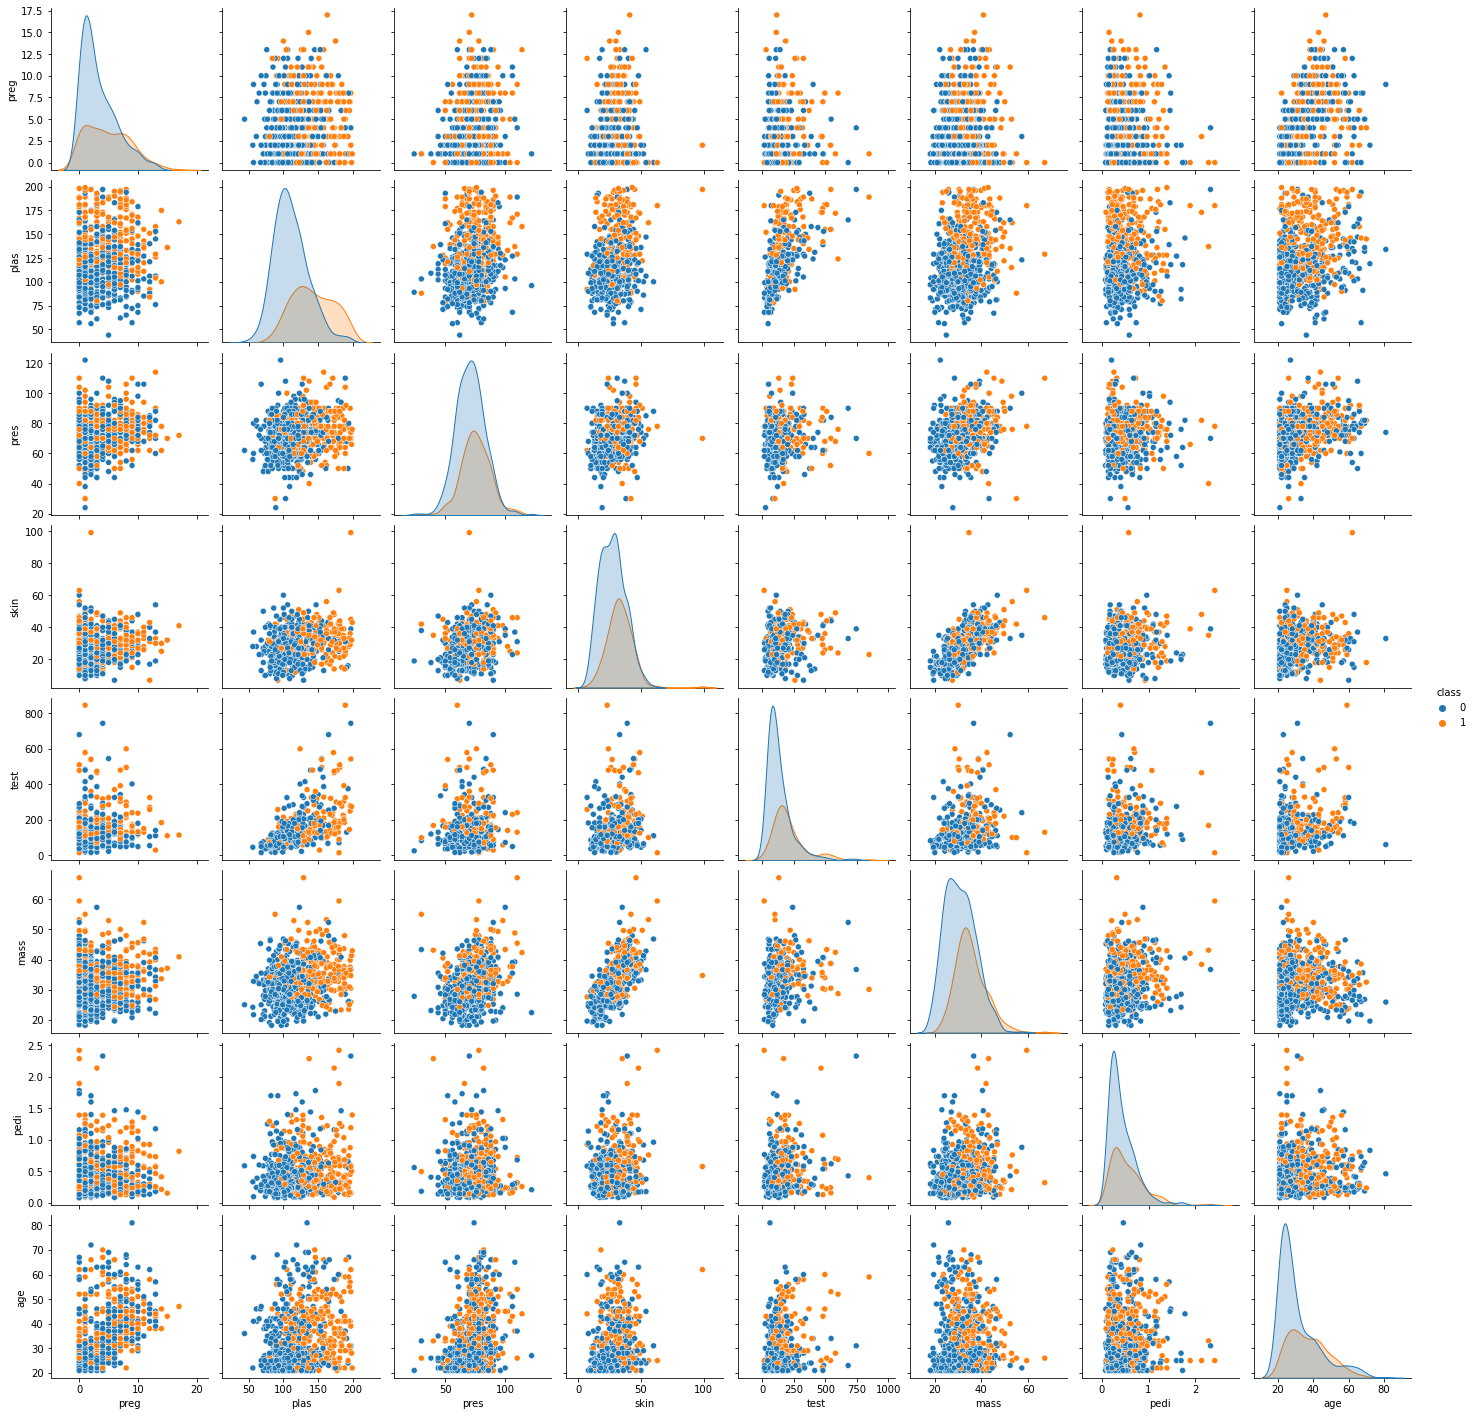

In [5]:
# plotting pairplot
sns.pairplot(data=pima_df,hue='class',diag_kind='kde')

In [6]:
# split into independant and dependant features
X = pima_df.drop(['class'],axis=1)

y = pima_df[['class']]

In [7]:
# filling missing values 
imputer = SimpleImputer(strategy='median')

transformed_X = imputer.fit_transform(X)

In [8]:
# split to train test data
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.30, random_state=7)

In [9]:
# ML model build
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [10]:
# accuracy score
dt_model.score(X_test , y_test)

0.70995670995671

In [11]:
# making predictions
y_predict = dt_model.predict(X_test)

<AxesSubplot:>

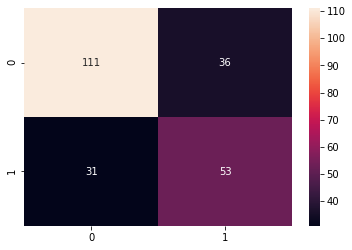

In [12]:
cm = metrics.confusion_matrix(y_test,y_predict)
cm_df = pd.DataFrame(cm)
sns.heatmap(cm_df,annot=True,fmt='g')

In [13]:
# regularizing the model
dt_model = DecisionTreeClassifier(criterion = 'entropy',  max_depth = 8)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [14]:
# accuracy score
dt_model.score(X_test , y_test)

0.7402597402597403

In [15]:
# making predictions
y_predict = dt_model.predict(X_test)

<AxesSubplot:>

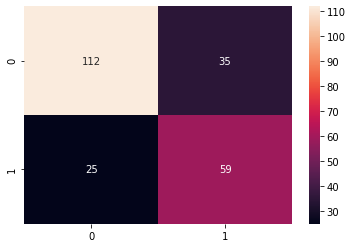

In [16]:
cm = metrics.confusion_matrix(y_test,y_predict)
cm_df = pd.DataFrame(cm)
sns.heatmap(cm_df,annot=True,fmt='g')